# HURRICAN CAPSTONE PROJECT

##### THIS IS A CNN PROJECT,THE MAIN PURPOSE OF THIS PROJECT IS TO CLASSIFY THE AREAS WHICH ARE AFFECTED BY HURRICAN CYCLONE.
##### HERE WE HAVE TWO IMAGE DATA LIKE (DAMAGED AREA,NO DAMAGED AREA).
##### TWO HIDDEN LAYERS ARE USED IN THIS PROJECT.
##### SOFTMAX IS THE ACTIVATION FUNCTION USED FOR OUTPUT LAYER.
###### THE DATA IS THAKEN FROM THE KAGGLE WEBSITE.

### IMPORT NESSEARY LIBRARY

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.utils import shuffle
from skimage.transform import resize
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import glob
from sklearn.model_selection import train_test_split

### READ THE FILE

In [2]:
damage= glob.glob('train_another/damage/*.jpeg')
no_damage = glob.glob('train_another/no_damage/*.jpeg')

In [3]:
damage_test= glob.glob('test/damage/*.jpeg')
no_damage_test = glob.glob('test/no_damage/*.jpeg')

In [4]:
len(damage_test)

1000

### ADD  TEST DATA INTO A EMPTY LIST

In [5]:
image = []
label = []

for i in damage:
    img=plt.imread(i)
    image.append(img)
    label.append(0)

    
for i in no_damage:
    img=plt.imread(i)
    image.append(img)
    label.append(1)

### ADD TRAIN DATA INTO EMPTY LIST

In [6]:
image_test=[]
label_test=[]

for i in damage_test:
    img=plt.imread(i)
    image_test.append(img)   
    label_test.append(0)
    
for i in no_damage_test:
    img=plt.imread(i)
    image_test.append(img)
    label_test.append(1)

### SHUFFLE THE DATA

In [38]:
image, label = shuffle(image,label, random_state = 100)

In [39]:
image_test, label_test = shuffle(image_test,label_test, random_state = 100)

### PLOT SOME IMAGES

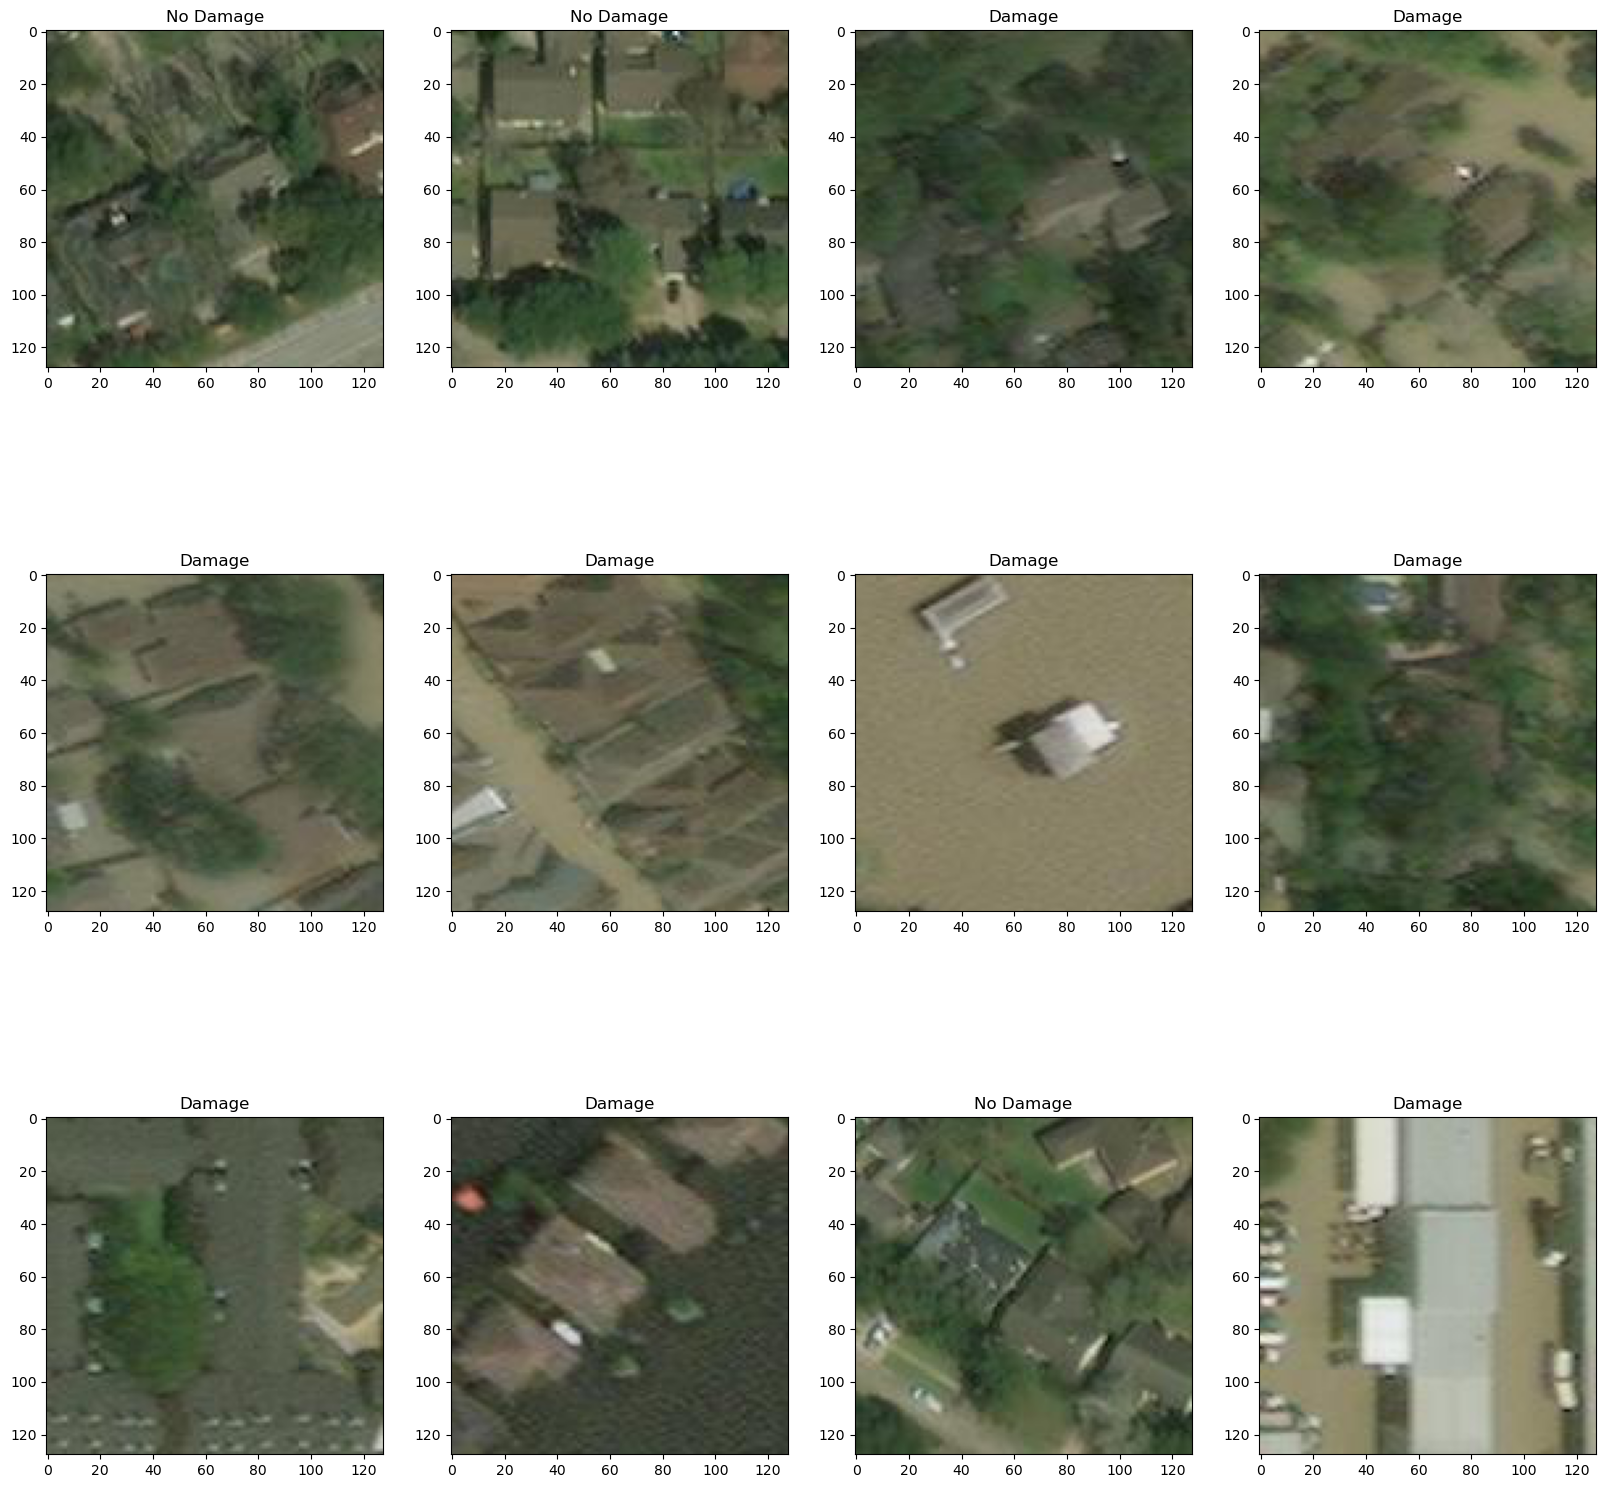

In [40]:
plt.figure(figsize = (20,20))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(image[i])
    if label[i] == 1:
        plt.title('No Damage')
    else:
        plt.title('Damage')

### TRAIN AND TEST  THE DATA

In [7]:
X_train = []

for i in image:
    X_train.append(resize(i,(64,64,3)))
    
X_train = np.array(X_train)

In [8]:
X_test = []

for i in image_test:
    X_test.append(resize(i,(64,64,3)))
    
X_test = np.array(X_test)

### PLOT SOME IMAGE AFTER SHUFFLING

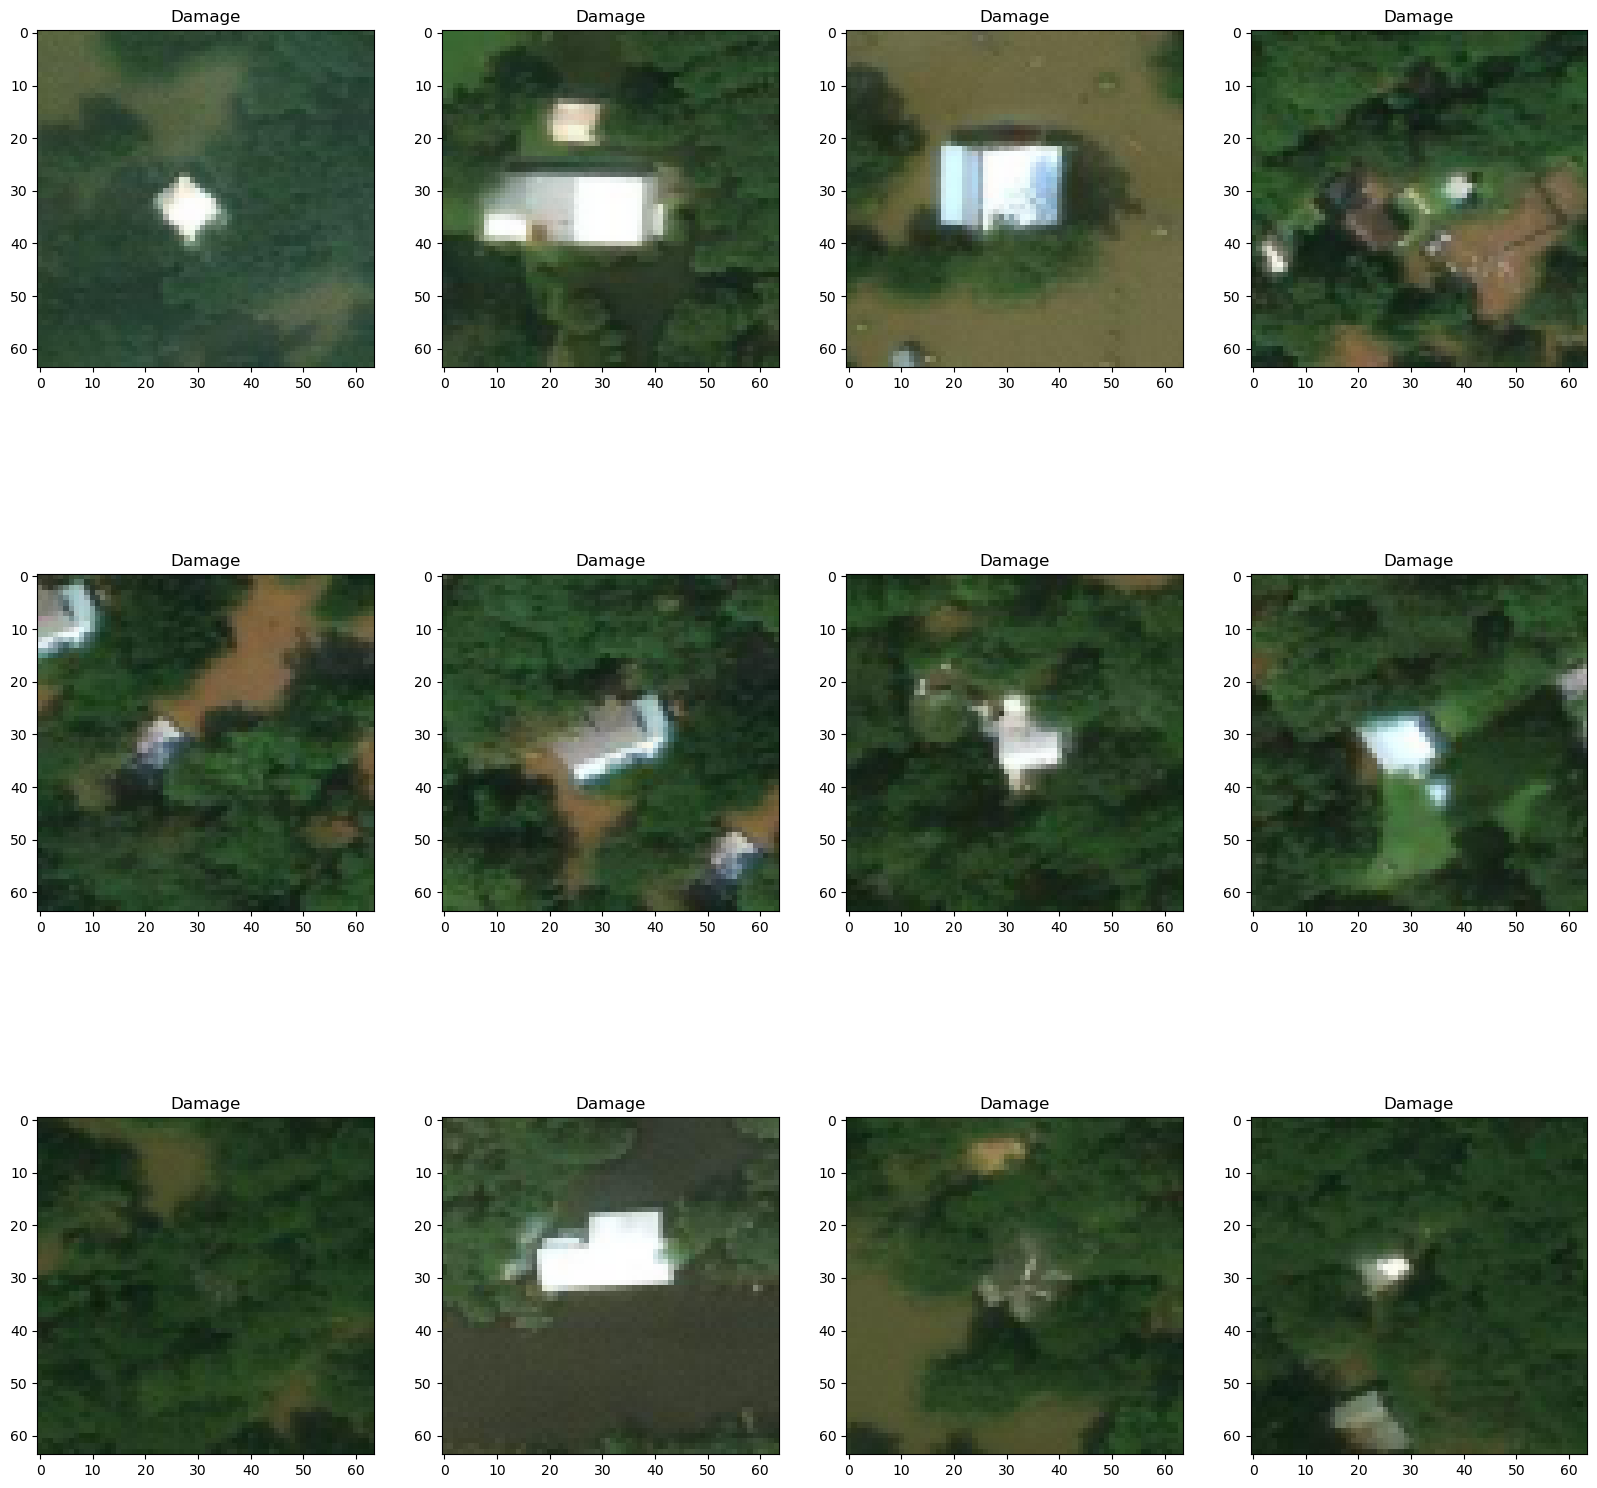

In [9]:
plt.figure(figsize = (20,20))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(X_train[i])
    if label[i] == 1:
        plt.title('No Damage')
    else:
        plt.title('Damage')

### CHECK THE SHAPE

In [10]:
X_test.shape

(2000, 64, 64, 3)

In [11]:
X_train.shape

(10000, 64, 64, 3)

### Create keras Sequential model with CNN

In [12]:
model = keras.models.Sequential([
    keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (64, 64, 3)),
    keras.layers.MaxPool2D(2,2),
    
    keras.layers.Conv2D(32,(3,3), activation = 'relu'),
    keras.layers.MaxPool2D(2,2),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(2, activation = 'sigmoid')
])

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### COMPILE THE MODEL

In [15]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [48]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 62, 62, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 31, 31, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 29, 29, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │         401,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 406,690 (1.55 MB)

 Trainable params: 406,690 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

### TRAIN THE MODEL

In [17]:
y_train = np.array(label)
y_test = np.array(label_test)

In [18]:
model.fit(X_train,y_train, epochs=10, validation_split=0.1)

Epoch 1/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.6746 - loss: 0.5774 - val_accuracy: 0.8640 - val_loss: 0.3657
Epoch 2/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.8488 - loss: 0.3806 - val_accuracy: 0.8920 - val_loss: 0.2996
Epoch 3/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.8845 - loss: 0.3038 - val_accuracy: 0.9060 - val_loss: 0.2363
Epoch 4/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.8997 - loss: 0.2520 - val_accuracy: 0.9110 - val_loss: 0.2091
Epoch 5/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.9123 - loss: 0.2152 - val_accuracy: 0.9230 - val_loss: 0.1809
Epoch 6/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.9368 - loss: 0.1657 - val_accuracy: 0.9300 - val_loss: 0.1664
Epoch 7/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.9426 - loss: 0.1474 - val_accuracy: 0.9330 - val_loss: 0.1581
Epoch 8/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.9472 - loss: 0.1280 - val_accu

### EVALUATE THE MODEL

In [19]:
model.evaluate(X_train, y_train)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9489 - loss: 0.1291


[0.13166379928588867, 0.9478999972343445]

### MAKE PREDICTION WITH X_TEST

In [13]:
prediction = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


In [14]:
pred=[np.argmax(i) for i in prediction]

### CHECK ACCURACY SCORE OF THE MODEL

In [15]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [18]:
accuracy_score(y_test,pred)

0.5035

### PLOT A HEATMAP

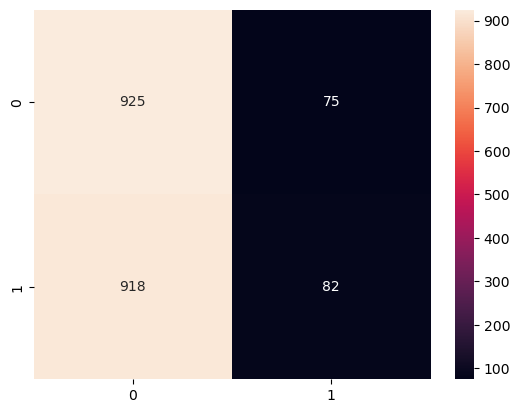

In [19]:
sns.heatmap(confusion_matrix(y_test,pred), annot = True,fmt='d')
plt.show()

### CLASSIFICATION REPORT

In [21]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.50      0.93      0.65      1000
           1       0.52      0.08      0.14      1000

    accuracy                           0.50      2000
   macro avg       0.51      0.50      0.40      2000
weighted avg       0.51      0.50      0.40      2000

